<a href="https://colab.research.google.com/github/Sauravnegi007/data-science/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [170]:
df=pd.read_excel("Data_Train.xlsx")

In [171]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [173]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [174]:
df.shape

(10683, 11)

In [175]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [176]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [177]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [178]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

<ipython-input-178-0dae34bde00c>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


In [179]:
df['Day']=df['Date_of_Journey'].dt.day
df['Month']=df['Date_of_Journey'].dt.month
df['Year']=df['Date_of_Journey'].dt.year

In [180]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [181]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [182]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])


In [183]:
df['Dep_Hour']=df['Dep_Time'].dt.hour
df['Dep_Minute']=df['Dep_Time'].dt.minute

In [184]:
df.drop('Dep_Time',axis=1,inplace=True)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Dep_Hour         10683 non-null  int64 
 13  Dep_Minute       10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [186]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [187]:
df['Arrival_hour'] = df['Arrival_Time'].dt.hour
df['Arrival_minute'] = df['Arrival_Time'].dt.minute

In [188]:
#now Drop the Arrival Time
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Day              10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Dep_Hour         10683 non-null  int64 
 12  Dep_Minute       10683 non-null  int64 
 13  Arrival_hour     10683 non-null  int64 
 14  Arrival_minute   10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [190]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [191]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [192]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [193]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,5,6,2019,9,45,9,25


In [194]:
df['Total_Stops'].isnull().sum()


1

In [195]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [196]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,3,1,2019,16,50,21,35


In [205]:
df['duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df[df['duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,duration_hour,duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,17327,3,6,2019,16,50,16,55,5m,NaN


In [207]:
df.drop(6474,axis=0,inplace=True)

In [209]:
df['duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [211]:
df['duration_min']=df['duration_min'].fillna(0)

In [214]:
df.drop('Duration',axis=1,inplace=True)


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10681 non-null  object 
 4   Total_Stops      10681 non-null  float64
 5   Additional_Info  10682 non-null  object 
 6   Price            10682 non-null  int64  
 7   Day              10682 non-null  int64  
 8   Month            10682 non-null  int64  
 9   Year             10682 non-null  int64  
 10  Dep_Hour         10682 non-null  int64  
 11  Dep_Minute       10682 non-null  int64  
 12  Arrival_hour     10682 non-null  int64  
 13  Arrival_minute   10682 non-null  int64  
 14  duration_hour    10682 non-null  object 
 15  duration_min     10682 non-null  object 
dtypes: float64(1), int64(8), object(7)
memory usage: 1.4+ MB


In [217]:
# convert object into int
df['duration_hour']=df['duration_hour'].astype(int)
df['duration_min']=df['duration_min'].astype(int)

In [219]:
df.groupby('Airline')['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9606.804112
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

Data Visualization

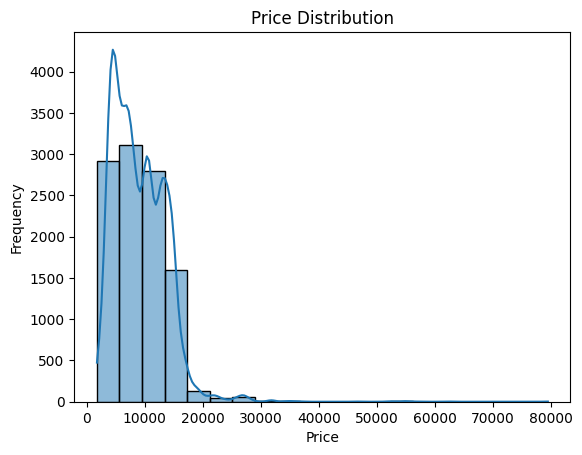

In [225]:
# histogram
sns.histplot(df['Price'],kde=True,bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

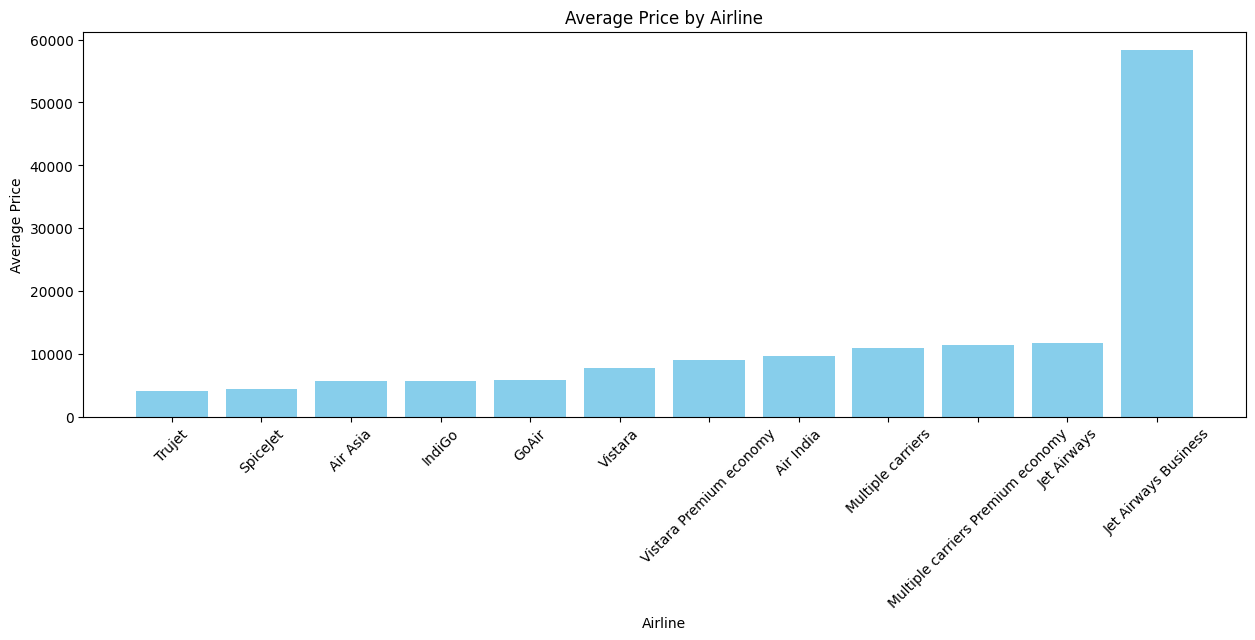

In [231]:
# Bar Chart
average_prices = df.groupby('Airline')['Price'].mean().sort_values()
plt.figure(figsize=(15, 5))

plt.bar(average_prices.index, average_prices.values, color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Price by Airline')
plt.xticks(rotation=45)
plt.show()

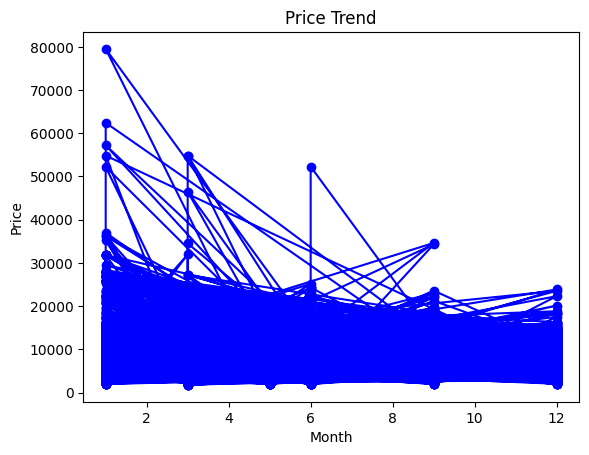

In [238]:
# Line Chart
plt.plot(df['Month'], df['Price'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price Trend')
plt.show()

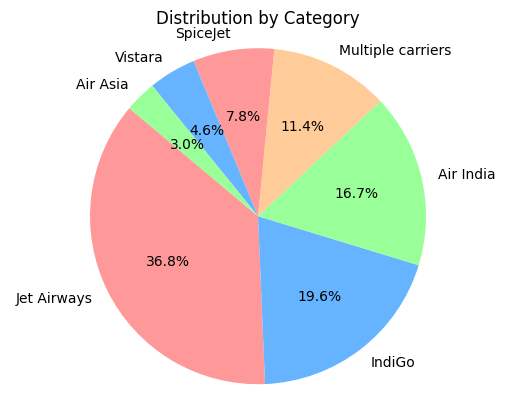

In [242]:
category_counts = df['Airline'].value_counts().head(7)

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.axis('equal')
plt.title('Distribution by Category')
plt.show()